## Import The Data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Adidas.csv') 

In [42]:
df

,Unnamed: 0,Unnamed: 1,Adidas Sales Database,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
2,NaN,Foot Locker,1185732,01-01-20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
3,NaN,Foot Locker,1185732,01-02-20,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
4,NaN,Foot Locker,1185732,01-03-20,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,NaN,Foot Locker,1185732,01-24-21,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,0.28000000000000003,Outlet
9646,NaN,Foot Locker,1185732,01-24-21,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9647,NaN,Foot Locker,1185732,02-22-21,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37000000000000005,Outlet
9648,NaN,Foot Locker,1185732,02-22-21,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42000000000000004,Outlet


## Renaming Columns

In [48]:
df = df.rename(columns={'Invoice Date' : 'InvoiceDate'})
df = df.rename(columns={'Price per Unit' : 'ppu'})
df = df.rename(columns={'Units Sold' : 'Units_sold'})
df = df.rename(columns={'Total Sales' : 'Total_sales'})
df = df.rename(columns={'Operating Profit' : 'Operating_profit'})
df = df.rename(columns={'Operating Margin' : 'Operating_margin'})
df = df.rename(columns={'Sales Method' : 'Sales_method'})

## Start the Data Cleaning

In [44]:
df = df.drop('Unnamed: 0', axis=1)
df = df.iloc[1:]
# Drop all NaN's

In [45]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
# Resetting the Index

In [64]:
null = df[df['Total_sales'] == 0]
null
# Spotting Rows with Value 0 

1,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,ppu,Units_sold,Total_sales,Operating_profit,Operating_margin,Sales_method


In [63]:
df.drop(null.index, inplace=True)
# Drop them

## DType Transformation

In [51]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['ppu'] = df['ppu'].astype('int64')
df['Units_sold'] = df['Units_sold'].astype('int64')
df['Total_sales'] = df['Total_sales'].astype('int64')
df['Operating_profit'] = df['Operating_profit'].astype('float64')
df['Operating_margin'] = df['Operating_margin'].astype('float64')

C:\Users\Emilio\AppData\Local\Temp\ipykernel_8384\1130915971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## Start with Basic EDA

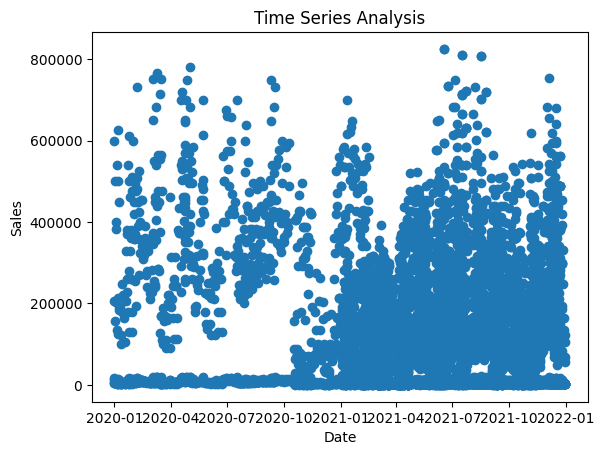

In [52]:
plt.scatter(df['InvoiceDate'], df['Total_sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Analysis')
plt.show()

In [ ]:
# I See that the Sales Increase over Time

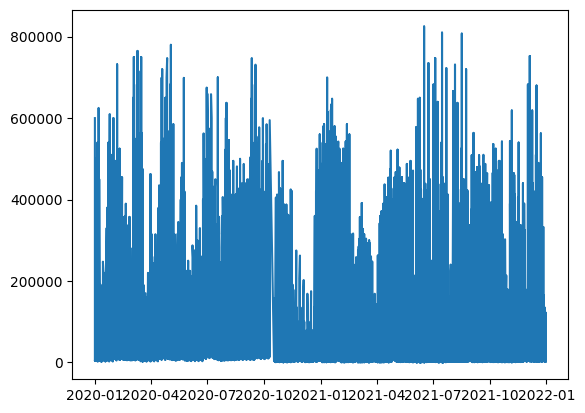

In [53]:
df = df.sort_values('InvoiceDate')

plt.plot(df['InvoiceDate'], df['Total_sales'])
plt.show()

In [ ]:
# Double Check

## Some Statistics to Understand the Distribution

In [54]:
df['Total_sales'].describe()

count      9648.000000
mean      93273.437500
std      141916.016727
min           0.000000
25%        4254.500000
50%        9576.000000
75%      150000.000000
max      825000.000000
Name: Total_sales, dtype: float64

In [55]:
df['Total_sales'].max()

825000

In [65]:
df['Total_sales'].min()

160

In [69]:
mean_value = df['Total_sales'].mean()
max_value = df['Total_sales'].max()
min_value = df['Total_sales'].min()

percent_above_mean = ((max_value - mean_value) / mean_value) * 100
percent_above_mean
# See how much Percent the Highest Value is more then the Mean

796.6529181041407

In [70]:
percent_below_mean = ((mean_value - min_value) / min_value) * 100
percent_below_mean
# See how much Percent the mean is larger then the minimum Value

57405.52857065629

## Get Basic Insights

In [72]:
df['Sales_method'].value_counts()

Sales_method
Online      4751
Outlet      2816
In-store    1682
Name: count, dtype: int64

In [73]:
df['Retailer'].value_counts()

Retailer
Foot Locker      2492
West Gear        2120
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [77]:
sales_by_city = df.groupby('City')['Total_sales'].sum().sort_values(ascending=False)
sales_by_city
# Looking what City Performs the Best / Worse

City
Charleston        39974797
San Francisco     34539220
Miami             31600863
Portland          30545652
Orlando           27682851
Seattle           26330718
Los Angeles       25634913
Houston           25456882
Albany            24427804
Charlotte         23956531
New Orleans       23750781
Honolulu          22282457
Richmond          21575040
Dallas            20902864
Albuquerque       19865016
Boise             19276878
Atlanta           18997466
Denver            18899776
Detroit           18625433
Cheyenne          18577517
Columbus          18484583
Knoxville         18067440
Birmingham        17633424
Manchester        16411667
Phoenix           15782221
Billings          15710886
Jackson           15591709
New York          14792667
Anchorage         14753103
Burlington        14352923
Little Rock       12639347
Wilmington        12298412
Hartford          11573448
Boston            11076810
Oklahoma City     10620734
Louisville        10072848
Wichita            9972

In [78]:
df['Product'].value_counts()

Product
Women's Apparel              1544
Men's Street Footwear        1543
Men's Athletic Footwear      1543
Men's Apparel                1543
Women's Street Footwear      1541
Women's Athletic Footwear    1535
Name: count, dtype: int64

## Safe and Continue Analysis in Power BI

In [ ]:
#df.to_csv(adidas_sales.csv')